In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# gaussian function

In [2]:
norm?

Signature:       norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x2add46f7db10>
File:            ~/anaconda/envs/py37/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=

(array([9.53909743e-05, 1.98201247e-03, 1.88096869e-02, 7.33768573e-02,
        1.27255093e-01, 9.57831372e-02, 3.13624326e-02, 4.33498983e-03,
        2.82639924e-04, 1.76649952e-05]),
 array([-8.18451223, -5.35405576, -2.5235993 ,  0.30685717,  3.13731363,
         5.9677701 ,  8.79822656, 11.62868303, 14.45913949, 17.28959596,
        20.12005242]),
 [<matplotlib.patches.Polygon at 0x2add4979c310>])

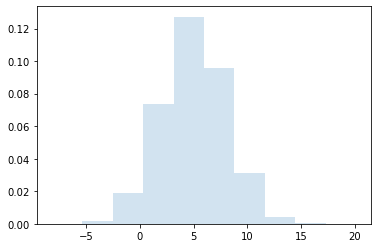

In [15]:
gau = norm(loc = 5, scale = 3)
plt.hist(gau.rvs(100000), density=True, histtype='stepfilled', alpha=0.2)

In [64]:
norm.pdf(5,loc=5.3,scale = 10.3)

0.03871583472546248

In [17]:
def gau(x,sigma,mu):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(- (x - mu)**2 / (2 * sigma**2))
    return y

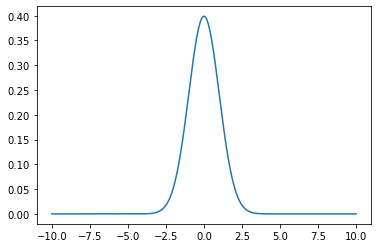

In [18]:
x = np.linspace(-10 ,10, 10000)
y = gau(x ,1,0)
plt.plot(x,y)

In [65]:
gau(5,10.3,5.3)

0.03871583472546248

# Definition of cdf

## the fraction of blus galaxies

In [119]:
def blue(M):
    if  M <= -26.571:
        y = 0
        return y
    elif (M < -19.539):
        y = 0.46 + 0.07 * (M + 20)
        return y
    elif M < -17.173:
        y = 0.4 + 0.2 * (M + 20)
        return y
    else :
        y = 1 / (1 + np.exp(- (M + 20.5)))
        return y

In [131]:
m_col = np.linspace(-28, -15,1000)
f_col = []
for i in range(1000):
    f_col.append(blue(m_col[i]))


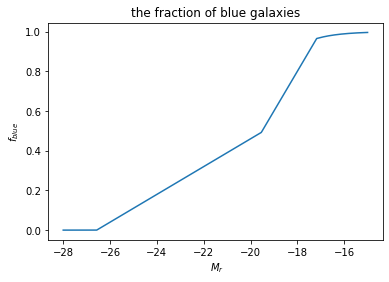

In [136]:
plt.plot(m_col,f_col)
plt.title(r'the fraction of blue galaxies')
plt.xlabel(r' $M_r$ ')
plt.ylabel(r'$f_{blue}$')
plt.savefig('/home/yunzheng/mock/abundance_new/picture/frac_blue.pdf',dpi = 100)

## the two Gaussian components

In [66]:
def mu_blue(M,z):
    y = 0.62 - 0.11 * (M + 20) - 0.25 * (min(z,0.4) - 0.1)
    return y
def sigma_blue(M,z):
    y = 0.12 + 0.02 * (M + 20) + 0.2 * (z - 0.1)
    return y
def mu_red(M,z):
    y = 0.932 - 0.032 * (M + 20) - 0.18 * (min(z,0.4) - 0.1)
    return y
def sigma_red(M,z):
    y = 0.07 + 0.01 * (M + 20) + 0.5 * (z - 0.1) + 0.1 * (z - 0.1)**2
    return y

In [67]:
def cdf(col,M,z):
    y = blue(M) * norm.pdf(col,loc = mu_blue(M, z),scale = sigma_blue(M, z)) + (1 - blue(M)) * norm.pdf(col,loc = mu_red(M,z),scale = sigma_red(M,z))
    return y

In [77]:
def cdf_new(col,M,z):
    y = blue(M) * norm.cdf(col,loc = mu_blue(M, z),scale = sigma_blue(M, z)) + (1 - blue(M)) * norm.cdf(col,loc = mu_red(M,z),scale = sigma_red(M,z))
    return y

In [137]:
color = np.linspace(-0.5,1.5,100)

dis17 = cdf(color,-17.5,0.2)
dis18 = cdf(color,-18.5,0.2)
dis19 = cdf(color,-19.5,0.2)
dis20 = cdf(color , -20.5,0.2)
dis21 = cdf(color,-21.5,0.2)

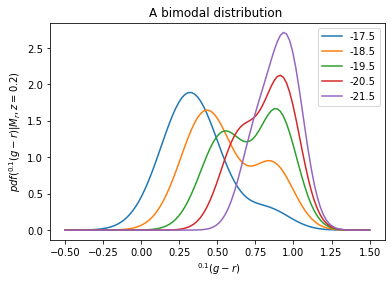

In [94]:
plt.plot(color,dis17,label = '-17.5')
plt.plot(color,dis18,label = '-18.5')
plt.plot(color,dis19,label = '-19.5')
plt.plot(color,dis20,label = '-20.5')
plt.plot(color,dis21,label = '-21.5')
plt.legend()
plt.title(r'A bimodal distribution ')
plt.xlabel(r' $^{0.1}(g-r)$ ')
plt.ylabel(r'$pdf(^{0.1}(g-r)|M_r,z =0.2)$')
plt.savefig('/home/yunzheng/mock/abundance_new/picture/color_pdf_0.2.pdf',dpi = 100)

## Cumulative distribution functions

In [96]:
color = np.linspace(-0.5,1.5,100)
dis20 = cdf_new( color , -20.5,0.2)
dis17 = cdf_new(color,-17.5,0.2)
dis18 = cdf_new(color,-18.5,0.2)
dis19 = cdf_new(color,-19.5,0.2)
dis21 = cdf_new(color,-21.5,0.2)

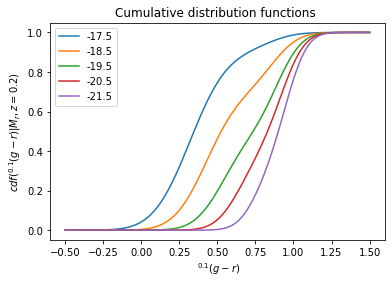

In [97]:

plt.plot(color,dis17,label = '-17.5')
plt.plot(color,dis18,label = '-18.5')
plt.plot(color,dis19,label = '-19.5')
plt.plot(color,dis20,label = '-20.5')
plt.plot(color,dis21,label = '-21.5')
plt.legend()
plt.title(r'Cumulative distribution functions ')
plt.xlabel(r' $^{0.1}(g-r)$ ')
plt.ylabel(r'$cdf(^{0.1}(g-r)|M_r,z =0.2)$')
plt.savefig('/home/yunzheng/mock/abundance_new/picture/color_cdf_0.2.pdf',dpi = 100)